# IND5003 Enron Project
## Contents of this Jupyter Notebook
### Dataset
Dataset from Prof: 
(https://www.cs.cmu.edu/~./enron/)
- Unstructured Dataset containing raw text in the form of emails
**Make sure that the dataset 'maildir' is in the same directory as your project on your own system. Else this would not work**

## Approach to this Project

### Research Questions
(Use research questions to provide a narrative and storyline in our analysis of the Enron Email Corpus)

We would be taking a broad to narrow approach in terms of the narrative that we are looking to create. 

Some research questions that we would be hoping to analyse in this project are:
1. Are there any topical shifts that we can identify prior, leading up to and after the fraud has been exposed?
2. Can we detect sentiment shifts and anomalies in communication patterns leading up to, during and after the exposure of the fraud?
3. Identification of key individuals involved in the key discussions and anomalies in their comms patterns

#### Timeline

We have an intention to split our analysis into 3 defined timeframes:
1. Pre-Crisis (June 1999 - Aug 2001)
2. During Crisis (Sep 2000 - Oct 2001 )
3. Post Crisis (Nov 2001 - June 2002)

These research questions would be answered using a variety of NLP and Unsupervised Learning Techniques. 

*** [GUYS WE NEED TO THINK OF THE TECHNIQUES] ***
1. t-sne for initial identification of clusters
2. LDA for topic identification
3. Named entity recognition for trends in any entity
4. Sentimental Analysis
5. Anomaly detection (HOW?) 
6. Information retrieval to identify relevant individuals

### Overall Steps to Tackle this Project
1. Data Extraction
2. Data Cleaning & Preprocessing
3. Initial Data Exploration
    - Sender Frequency Analysis
    - Number of Emails Across Time
    - General topic modeling
    - General sentiment analysis
    - Word Cloud & Bar Charts for the Top Senders (20%)
    - Network Graph
    - t-sne graph
4. Research Questions
    1. Temporal Topical shifts using LDA Topic Modeling
    2. Temporal Sentimental Analysis - Segment the emails by quarters. Look at the way communication changes over time.
    3. Anomaly detection using?
    4. Key individual detection using?

    

## Section 1: Data Extraction
- Extract the emails from the unstructured raw folder


In [82]:
# Import the relevant libraries required for Section 1
import os # Required for directory traversal
import pandas as pd
import email
from email import policy
from email.parser import BytesParser
from collections import defaultdict
from itertools import islice

# additional libraries added for possible usage
import numpy as np
import pprint
import nltk
import re
import gensim
from gensim.parsing.preprocessing import *
import gensim.downloader as api
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import manifold

from transformers import pipeline

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import plotly.express as px


[nltk_data] Downloading package wordnet to /Users/Dylan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Dylan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# # Set the maildir path to the respective paths in your system 
# # ! Note that maildir should be in the same directory as your project on your own system, would change if you are using windows
# maildir_path = '/Users/Dylan/Documents/IND5003/Projects/maildir'

In [4]:
# # Create a list of all the directories in the maildir for sanity check
# maildir_list = os.listdir(maildir_path)
# print(maildir_list)

In [5]:
# def parse_email(file_path):
#     try:
#         with open(file_path, 'rb') as f:
#             msg = BytesParser(policy=policy.default).parse(f)
        
#         # Extract fields from the email
#         email_from = msg['From']
#         email_to = msg['To']
#         email_date = msg['Date']
#         email_subject = msg['Subject']
#         email_body = msg.get_body(preferencelist=('plain')).get_content() if msg.get_body(preferencelist=('plain')) else ''
        
#         return [email_from, email_to, email_date, email_subject, email_body]
#     except Exception as e:
#         print(f"Error parsing file {file_path}: {e}")
#         return None

# def batch_iterator(iterator, batch_size):
#     """Yield batches of specified size from an iterator."""
#     while True:
#         batch = list(islice(iterator, batch_size))
#         if not batch:
#             break
#         yield batch

# def load_emails(maildir_path, batch_size=10, max_emails=50):
#     email_data = []
#     file_paths = []

#     # Walk through the directory to collect file paths
#     for root, dirs, files in os.walk(maildir_path):
#         for file in files:
#             if file == '.DS_Store' or file.startswith('.'):
#                 continue  # Skip system files and hidden files
#             file_paths.append(os.path.join(root, file))
#             if len(file_paths) >= max_emails:
#                 break
#         if len(file_paths) >= max_emails:
#             break

#     # Process emails in batches
#     for batch in batch_iterator(iter(file_paths), batch_size):
#         batch_data = []
#         for file_path in batch:
#             result = parse_email(file_path)
#             if result is not None:
#                 batch_data.append(result)
        
#         # Append batch data to the main list
#         email_data.extend(batch_data)

#     # Create a DataFrame from the extracted data
#     df = pd.DataFrame(email_data, columns=['From', 'To', 'Date', 'Subject', 'Body'])
#     return df

# # Load and parse emails
# emails_df = load_emails(maildir_path, batch_size=10, max_emails=50)

# # Display the DataFrame
# print(emails_df.head())

In [6]:

# # ! This is a very large dataset and will take a long time to run
# # ! DO NOT RUN THIS FOR FUN UNLESS YOU WANT YOUR COMPUTER TO CRASH
# def parse_email(file_path):
#     try:
#         with open(file_path, 'rb') as f:
#             msg = BytesParser(policy=policy.default).parse(f)
        
#         # Extract fields from the email
#         email_from = msg['From']
#         email_to = msg['To']
#         email_date = msg['Date']
#         email_subject = msg['Subject']
#         email_body = msg.get_body(preferencelist=('plain')).get_content() if msg.get_body(preferencelist=('plain')) else ''
        
#         return [email_from, email_to, email_date, email_subject, email_body]
#     except Exception as e:
#         print(f"Error parsing file {file_path}: {e}")
#         return None

# def batch_iterator(iterator, batch_size):
#     """Yield batches of specified size from an iterator."""
#     while True:
#         batch = list(islice(iterator, batch_size))
#         if not batch:
#             break
#         yield batch

# def load_emails(maildir_path, batch_size=1000):
#     email_data = []
#     file_paths = []

#     # Walk through the directory to collect file paths
#     for root, dirs, files in os.walk(maildir_path):
#         for file in files:
#             if file == '.DS_Store' or file.startswith('.'):
#                 continue  # Skip system files and hidden files
#             file_paths.append(os.path.join(root, file))

#     # Process emails in batches
#     for batch in batch_iterator(iter(file_paths), batch_size):
#         batch_data = []
#         for file_path in batch:
#             result = parse_email(file_path)
#             if result is not None:
#                 batch_data.append(result)
        
#         # Append batch data to the main list
#         email_data.extend(batch_data)

#     # Create a DataFrame from the extracted data
#     df = pd.DataFrame(email_data, columns=['From', 'To', 'Date', 'Subject', 'Body'])
#     return df

# # Load and parse emails
# emails_df = load_emails(maildir_path, batch_size=1000)

# # Display the DataFrame
# print(emails_df.head())

### Loading the Data into a Pandas DF

In [7]:
# Convert emails_df to a CSV file
# Save the DataFrame as a CSV file in the specified directory

#emails_df.to_csv('/Users/Dylan/Documents/IND5003/Projects/emails_uncleaned.csv', index=False)


In [83]:
# Load the CSV file back into a DataFrame

# PLEASE CHANGE IT TO YOUR OWN DIRECTORY IN YOUR OWN SYSTEM 

# Load the CSV file back into a DataFrame

# PLEASE CHANGE IT TO YOUR OWN DIRECTORY IN YOUR OWN SYSTEM 

enron_uncleaned_emails = pd.read_csv('/Users/Dylan/Documents/IND5003/Projects/enron_emails_uncleaned.csv')

In [85]:
enron_uncleaned_emails.head()

,From,To,Date,Subject,Body
0,msagel@home.com,jarnold@enron.com,"Thu, 16 Nov 2000 09:30:00 -0800",Status,John:\n?\nI'm not really sure what happened be...
1,slafontaine@globalp.com,john.arnold@enron.com,"Fri, 08 Dec 2000 05:05:00 -0800",re:summer inverses,i suck-hope youve made more money in natgas la...
2,iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...","Tue, 15 May 2001 09:43:00 -0700",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."
3,jeff.youngflesh@enron.com,"anthony.gilmore@enron.com, colleen.koenig@enro...","Mon, 27 Nov 2000 01:49:00 -0800",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...
4,caroline.abramo@enron.com,mike.grigsby@enron.com,"Tue, 12 Dec 2000 09:33:00 -0800",Harvard Mgmt,Mike- I have their trader coming into the offi...


In [10]:
# # Find "kitchen" in the column "From"

# # This is to determine that there are still emails sent from louise kitchen despite the original parsing error due to the encoding of the email
# kitchen_emails = enron_uncleaned_emails[enron_uncleaned_emails['From'].str.contains('kitchen', case=False, na=False)]
# print(kitchen_emails)

## Section 2: Data Preprocessing
### Start with the Cleaning
* Check for any nulls
* Drop the missing values
* Remove the duplicates
* Format the dates 



In [86]:
# Check for Nulls in Each Column
missing_values = enron_uncleaned_emails.isnull().sum()
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
print(missing_values_df)

    Column  Missing Values
0     From               0
1       To           21847
2     Date               0
3  Subject           19187
4     Body               0


In [87]:
# Description of the DataFrame
enron_uncleaned_emails.describe()

,From,To,Date,Subject,Body
count,517396,495549,517396,498209,517396
unique,20326,58556,224119,159286,249020
top,kay.mann@enron.com,pete.davis@enron.com,"Wed, 27 Jun 2001 16:02:00 -0700",RE:,"As you know, Enron Net Works (ENW) and Enron G..."
freq,16735,9155,1118,6477,112


In [88]:
# Fill out the missing values with empty strings
enron_cleaned_emails = enron_uncleaned_emails.fillna('')

In [89]:
# Post cleaning Check
missing_values_check = enron_cleaned_emails.isnull().sum()
missing_values_df_check = pd.DataFrame({'Column': missing_values_check.index, 'Missing Values': missing_values_check.values})
print(missing_values_df_check)

    Column  Missing Values
0     From               0
1       To               0
2     Date               0
3  Subject               0
4     Body               0


In [8]:
# Describe the cleaned DataFrame
enron_cleaned_emails.describe()

,From,To,Date,Subject,Body
count,517396,517396,517396,517396,517396
unique,20326,58557,224119,159287,249020
top,kay.mann@enron.com,,"Wed, 27 Jun 2001 16:02:00 -0700",,"As you know, Enron Net Works (ENW) and Enron G..."
freq,16735,21847,1118,19187,112


* From running the code above, the output would show that there are 249020 emails with unique bodies out of the 517396 emails. 
    * This means that ~51.9% of emails in the uncleaned dataframe are not unique
    * This would ensure that the subsequent analytical metrics (when performing LDA, TFIDF, Word2vec) are not inflated. 

In [10]:
# Remove duplicate emails based on the 'Body' column, keeping only the first occurrence
enron_cleaned_emails_body_unique = enron_cleaned_emails.drop_duplicates(keep='first')
# Describe the DataFrame after removing duplicates
enron_cleaned_emails_body_unique.describe()

,From,To,Date,Subject,Body
count,255488,255488,255488,255488,255488
unique,20326,58557,224119,159287,249020
top,jeff.dasovich@enron.com,,"Wed, 27 Jun 2001 16:02:00 -0700",,test
freq,5530,9989,1118,8766,40


In [17]:
# # When running the code block above, i observed that jeff dasovich sent the most emails. 
# # Now i want to explore the number of emails he sent
# # Filter emails where 'From' is 'jeff.dasovich@enron.com'
# jeff_emails = enron_cleaned_emails_body_unique[enron_cleaned_emails_body_unique['From'] == 'jeff.dasovich@enron.com']

# # Count the number of emails he sent
# jeff_emails_count = jeff_emails.shape[0]

# # Display the count
# print(f"Jeff Dasovich sent {jeff_emails_count} emails.")

# # Display the first few rows of Jeff's emails
# jeff_emails.head()


In [11]:
# Convert the Date column to a pandas datetime object in the deduplicated dataframe
enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce', utc=True)

# Print the types of each column to ensure that the Date column is now a datetime object
print(enron_cleaned_emails_body_unique.dtypes)

From                    object
To                      object
Date       datetime64[ns, UTC]
Subject                 object
Body                    object
dtype: object


/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_3940/2504716352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce', utc=True)


In [12]:
# Extract the 'Year' from the 'Date' column
enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Date'].dt.year

# Convert the 'Year' column to an integer type if necessary
enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Year'].astype('Int64')

# Count the number of emails sent per year and sort the index (years)
emails_per_year = enron_cleaned_emails_body_unique['Year'].value_counts().sort_index()

# Create a DataFrame to hold the year and the number of emails
emails_per_year_df = pd.DataFrame({'Year': emails_per_year.index, 'Emails': emails_per_year.values})

# Print the resulting DataFrame
print(emails_per_year_df)

    Year  Emails
0   1980     292
1   1986       2
2   1997     112
3   1998      90
4   1999    4909
5   2000   65982
6   2001  154653
7   2002   29371
8   2004      66
9   2005       1
10  2007       1
11  2012       2
12  2020       2
13  2024       1
14  2043       1
15  2044       3


/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_3940/529211872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Date'].dt.year
/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_3940/529211872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Year'].astype('Int64')


In [14]:
# Create another column with the months of each row using the deduplicated dataframe
enron_cleaned_emails_body_unique['Month'] = enron_cleaned_emails_body_unique['Date'].dt.month.astype('Int64')

# Group the dataframe by Year and Month and count the number of emails (using 'From' as the count reference)
emails_per_month_year = enron_cleaned_emails_body_unique.groupby(['Year', 'Month']).count()['From']

# Print the resulting grouped data
print(emails_per_month_year)


Year  Month
1980  1        292
1986  4          1
      5          1
1997  1          1
      3         10
              ... 
2012  11         2
2020  12         2
2024  5          1
2043  12         1
2044  1          3
Name: From, Length: 73, dtype: int64


/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_3940/703201955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Month'] = enron_cleaned_emails_body_unique['Date'].dt.month.astype('Int64')


In [15]:
# Check the number of emails in 2002 divided by month
emails_per_month_year[2002]

Month
1     17154
2      6756
3      2930
4       954
5       748
6       745
7        76
9         6
10        1
12        1
Name: From, dtype: int64

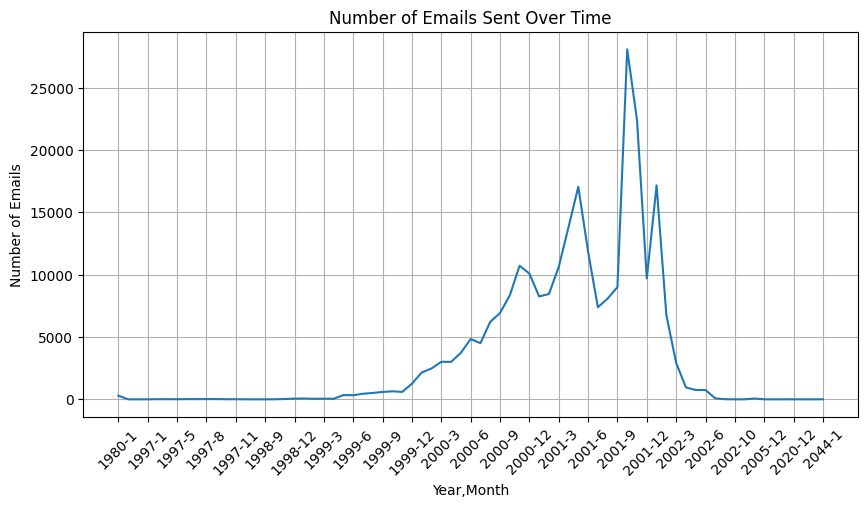

In [16]:
# Create large plot size
plt.figure(figsize=(10, 5))
emails_per_month_year.plot()
# Add tick marks in the x axis for every 3 months
plt.xticks(np.arange(0, len(emails_per_month_year), step=3), rotation=45,
           labels=[f"{year}-{month}" for year, month in emails_per_month_year.index][::3])
plt.ylabel('Number of Emails')
plt.title('Number of Emails Sent Over Time')
plt.grid()
plt.show()

In [17]:
import ssl
import certifi
ssl._create_default_https_context = ssl._create_unverified_context

# Download necessary datasets
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# Initialize the lemmatizer
wn = WordNetLemmatizer()

# Function to map NLTK's POS tags to WordNet POS tags
def get_wordnet_pos(word):
    """Get POS tag for lemmatization from NLTK's tag"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,  # Adjective
                "N": wordnet.NOUN, # Noun
                "V": wordnet.VERB, # Verb
                "R": wordnet.ADV}  # Adverb
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if the tag is not found


In [18]:
# Define function for cleaning and preprocessing the emails
def clean_the_mails(text):
    # Convert all the text to lowercase
    text = text.lower()
    
    # Remove all the special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text into words
    tokens = text.split()
    
    # Apply POS tagging and lemmatize each word
    tokens = [wn.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    
    # Rejoin the tokens into a single string
    return tokens


In [20]:
# Example sentence to clean and lemmatize
example_text = "This Lou pai loves strippers as side quest to helping Jeff Skiling."

# Clean and lemmatize the text
cleaned_text = clean_the_mails(example_text)

print("Original text:", example_text)
print("Cleaned and lemmatized text:", cleaned_text)


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/Users/Dylan/nltk_data'
    - '/Users/Dylan/Documents/IND5003/nltk_data'
    - '/Users/Dylan/Documents/IND5003/share/nltk_data'
    - '/Users/Dylan/Documents/IND5003/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [63]:
# # Applying the clean mail function to the Body column and import to csv for future usage

# # Apply the clean_the_mails function to the 'Body' column of your email dataset
# enron_cleaned_emails_body_unique['Cleaned_Body'] = enron_cleaned_emails_body_unique['Body'].apply(clean_the_mails)

# # Save the DataFrame with the cleaned data to a CSV file for future use
# enron_cleaned_emails_body_unique.to_csv('enron_cleaned_emails_with_cleaned_body.csv', index=False)

# # Display the first few rows of the DataFrame to inspect the cleaned and lemmatized results
# enron_cleaned_emails_body_unique[['Body', 'Cleaned_Body']].head()

## Splitting into Different Time Frames

In [21]:
# Import the cleaned data from the CSV file
enron_corpus = pd.read_csv('/Users/Dylan/Documents/IND5003/Projects/enron_cleaned_emails_with_cleaned_body.csv')

In [22]:
# Change enron corpus dataframe Date column to datetime object
enron_corpus['Date'] = pd.to_datetime(enron_corpus['Date'], errors='coerce', utc=True)

# Print dtypes of enron corpus dataframe
print(enron_corpus.dtypes)

From                         object
To                           object
Date            datetime64[ns, UTC]
Subject                      object
Body                         object
Year                          int64
Month                         int64
Cleaned_Body                 object
dtype: object


In [23]:
# Divide the enron_corpus into 3 dataframes

# The first dataframe for dates between June 1999 and August 2000 (Pre-crisis)
enron_pre_crisis = enron_corpus[(enron_corpus['Date'] >= '1999-06-01') & (enron_corpus['Date'] <= '2000-08-31')]

# The second dataframe for dates between Sep 2000 to Oct 2001 (During crisis)
enron_during_crisis = enron_corpus[(enron_corpus['Date'] >= '2000-09-01') & (enron_corpus['Date'] <= '2001-10-31')]

# The third dataframe for dates between November 2001 to June 2002 (Post-crisis)
enron_post_crisis = enron_corpus[(enron_corpus['Date'] >= '2001-11-01') & (enron_corpus['Date'] <= '2002-06-30')]

# Print the shape of each dataframe
print(enron_pre_crisis.shape)
print(enron_during_crisis.shape)
print(enron_post_crisis.shape)


(33981, 8)
(157792, 8)
(61382, 8)


# Q1 Topic Identification Across Time

Use LDA to find the most common topics across time under each of the pre-processed corpus under each period (pre, during, post crisis)

In [76]:
# import tokenized corpus from local folder


# Q2 ANALYSIS TESTING

## Choosing a Sentiment Analysis Model

#### 1st Model of Choice is cardiffnlp Twitter RoBERTa model
- Where: Hugging Face
- Why: Trained on Twitter dataset which can recognise informal, formal contexts and even sacarcm. 

In [24]:
# ! Create a text generation pipeline using the default model from huggingface
generator = pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [25]:
# Load the sentiment analysis pipeline with the cardiffnlp Twitter RoBERTa model
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [79]:
# classifier(["I hate Ken Lay and that scumbag Jeff Skilling!", "I absolutely trust Jeff Skiling with my 401k."])
# This was from the original DistilBERT model, the sentiment analysis model has been changed to the cardiffnlp/twitter-roberta-base-sentiment-latest model

In [26]:
# I like this model better because it seems to take into account sacarsm and context better than the original model
classifier(["I 'love' Ken Lay and that scumbag Jeff Skilling!", "I absolutely trust Jeff Skiling with my 401k.", "Enron is awesome!", "Lou pai that cheater loves strippers"])

[{'label': 'negative', 'score': 0.7734254002571106},
 {'label': 'positive', 'score': 0.8728737235069275},
 {'label': 'positive', 'score': 0.9846312403678894},
 {'label': 'negative', 'score': 0.6821617484092712}]

### Test the Twitter Model on Enron Dataset
* Determine if the model requires finetuning 

In [27]:
sample_emails = enron_corpus['Cleaned_Body'].head(10)
print(sample_emails)

0    ['john', 'im', 'not', 'really', 'sure', 'what'...
1    ['i', 'suckhope', 'youve', 'make', 'more', 'mo...
2    ['hi', 'follow', 'the', 'email', 'you', 'have'...
3    ['conference', 'room', 'tbd', 'this', 'meeting...
4    ['mike', 'i', 'have', 'their', 'trader', 'come...
5    ['sender', 'articlesemailmslganytimescom', 're...
6    ['current', 'note', 'user', 'reason', 'for', '...
7    ['the', 'attach', 'report', 'contains', 'an', ...
8    ['johnmike', 'hi', 'this', 'be', 'the', 'list'...
9    ['the', 'information', 'contain', 'herein', 'b...
Name: Cleaned_Body, dtype: object


In [28]:
# Join tokens from sample_emails back into a string
sample_emails = sample_emails.apply(lambda x: ' '.join(x.split()[:512])) # This is because the model chosen cannot handle more than 512 tokens. Hence emails may be too long

In [29]:
# Test the sentiment analysis model on the sample emails
sample_sentiments = classifier(sample_emails.tolist(), truncation = True, max_length = 512)

In [152]:
# # Display the results
# for i, sentiment in enumerate(sample_sentiments):
#     print(f"Email {i + 1}:")
#     # print("Cleaned Body:", ' '.join(sample_emails.iloc[i]))
#     print("Sentiment Prediction:", sentiment['label'])
#     print("Confidence Score:", sentiment['score'])
#     print("-" * 40)

Email 1:
Sentiment Prediction: neutral
Confidence Score: 0.8739973902702332
----------------------------------------
Email 2:
Sentiment Prediction: neutral
Confidence Score: 0.7745579481124878
----------------------------------------
Email 3:
Sentiment Prediction: neutral
Confidence Score: 0.9031914472579956
----------------------------------------
Email 4:
Sentiment Prediction: neutral
Confidence Score: 0.8824588656425476
----------------------------------------
Email 5:
Sentiment Prediction: neutral
Confidence Score: 0.8684152960777283
----------------------------------------
Email 6:
Sentiment Prediction: neutral
Confidence Score: 0.9017876982688904
----------------------------------------
Email 7:
Sentiment Prediction: neutral
Confidence Score: 0.8985042572021484
----------------------------------------
Email 8:
Sentiment Prediction: neutral
Confidence Score: 0.8956636786460876
----------------------------------------
Email 9:
Sentiment Prediction: neutral
Confidence Score: 0.90052

In [158]:
# # print out first 10 emails as a string
# for i, email in enumerate(enron_corpus['Body'].head(10)):
#     print(f"Email {i + 1}:")
#     print(email)
#     print("-" * 40)

Email 1:
John:
?
I'm not really sure what happened between us.? I was  under the impression 
after my visit to Houston that we were about to enter into  a trial agreement 
for my advisory work.? Somehow,?this never  occurred.? Did I say or do 
something wrong to screw this  up???
?
I don't know if you've blown this whole thing off, but I still  hope you are 
interested in trying?to create an arrangement.? As a  courtesy, here is my 
report from this past weekend.? If you are no longer  interested in my work, 
please tell me so.??Best wishes,
?
Mark Sagel
Psytech Analytics
(410)308-0245? 
 - energy2000-1112.doc
----------------------------------------
Email 2:
i suck-hope youve made more money in natgas last 3 weeks than i have. mkt shud
be getting bearish feb forward-cuz we already have the weather upon us-fuel
switching and the rest shud invert the whole curve not just dec cash to jan 
and
feb forward???? have a good weekend john

----------------------------------------
Email 3:
 Hi,

#### Dylan's Findings
- Purely looking at the body of Email 1 (read below):

        John:
    ?
    I'm not really sure what happened between us.? I was  under the impression 
    after my visit to Houston that we were about to enter into  a trial agreement 
    for my advisory work.? Somehow,?this never  occurred.? Did I say or do 
    something wrong to screw this  up???
    ?
    I don't know if you've blown this whole thing off, but I still  hope you are 
    interested in trying?to create an arrangement.? As a  courtesy, here is my 
    report from this past weekend.? If you are no longer  interested in my work, 
    please tell me so.??Best wishes,
    ?
    Mark Sagel
    Psytech Analytics
    (410)308-0245? 
    - energy2000-1112.doc

- I believe that there is a negative sentiment associated with this. 
- But the sentiment prediction is neutral, with a confidence score of 0.874

#### Next Steps
1. Find a new model
2. Fine tune existing models
3. Adjust Neutral Thresholds
4. Combine Models (Ensemble Sentiment Analysis) - Need to read up

### Trying to Adjust Neutral Thresholds first

In [159]:
# # Run sentiment analysis with truncation and max_length set to 512 tokens
# sample_sentiments = classifier(
#     sample_emails.tolist(), 
#     truncation=True, 
#     max_length=512, 
#     return_all_scores=True  # This will return the scores for all labels
# )

# # Display the full distribution of sentiment scores for each email
# for i, sentiment in enumerate(sample_sentiments):
#     print(f"Email {i + 1}:")
#     for label_score in sentiment:
#         print(f"Label: {label_score['label']}, Confidence Score: {label_score['score']}")
#     print("-" * 40)

/Users/Dylan/Documents/IND5003/ind5003/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Email 1:
Label: negative, Confidence Score: 0.050283659249544144
Label: neutral, Confidence Score: 0.8739973902702332
Label: positive, Confidence Score: 0.07571899890899658
----------------------------------------
Email 2:
Label: negative, Confidence Score: 0.05903390049934387
Label: neutral, Confidence Score: 0.7745579481124878
Label: positive, Confidence Score: 0.1664082258939743
----------------------------------------
Email 3:
Label: negative, Confidence Score: 0.03926655277609825
Label: neutral, Confidence Score: 0.9031914472579956
Label: positive, Confidence Score: 0.05754199996590614
----------------------------------------
Email 4:
Label: negative, Confidence Score: 0.03389590233564377
Label: neutral, Confidence Score: 0.8824588656425476
Label: positive, Confidence Score: 0.08364519476890564
----------------------------------------
Email 5:
Label: negative, Confidence Score: 0.0390135794878006
Label: neutral, Confidence Score: 0.8684152960777283
Label: positive, Confidence Scor

### Testing using Prof's Sentiment Analysis Model on Hugging Face

In [160]:
classifier_distilbert = pipeline("sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")

/Users/Dylan/Documents/IND5003/ind5003/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [161]:
distilbert_sentiments = classifier_distilbert(sample_emails.tolist(), truncation  = True, max_length = 512)

In [162]:
# # Display the results for each email
# for i, sentiment in enumerate(distilbert_sentiments):
#     print(f"Email {i + 1}:")
#     print("Sentiment Prediction:", sentiment['label'])
#     print("Confidence Score:", sentiment['score'])
#     print("-" * 40)

Email 1:
Sentiment Prediction: NEGATIVE
Confidence Score: 0.9988855719566345
----------------------------------------
Email 2:
Sentiment Prediction: NEGATIVE
Confidence Score: 0.9952930808067322
----------------------------------------
Email 3:
Sentiment Prediction: NEGATIVE
Confidence Score: 0.9960916638374329
----------------------------------------
Email 4:
Sentiment Prediction: NEGATIVE
Confidence Score: 0.9927567839622498
----------------------------------------
Email 5:
Sentiment Prediction: NEGATIVE
Confidence Score: 0.9557116627693176
----------------------------------------
Email 6:
Sentiment Prediction: NEGATIVE
Confidence Score: 0.9974231719970703
----------------------------------------
Email 7:
Sentiment Prediction: NEGATIVE
Confidence Score: 0.9918583035469055
----------------------------------------
Email 8:
Sentiment Prediction: NEGATIVE
Confidence Score: 0.9920291304588318
----------------------------------------
Email 9:
Sentiment Prediction: NEGATIVE
Confidence Score

#### Findings from Dylan using Distilbert sst-2
- Not good
- Only email 1 was negative since it had sentiments of disappointment and confusion.

### Trying to perform ensemble sentiment analysis with Twitter Model and SST-2

In [164]:
# classifier_roberta = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")
# classifier_distilbert = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# # Select a sample of emails from the Cleaned_Body column
# sample_emails = enron_corpus['Cleaned_Body'].head(5)
# sample_emails = sample_emails.apply(lambda x: ' '.join(x.split()[:512]))  # Truncate to 512 tokens

# # Run sentiment analysis using both models
# roberta_sentiments = classifier_roberta(sample_emails.tolist(), truncation=True, max_length=512, return_all_scores=True)
# distilbert_sentiments = classifier_distilbert(sample_emails.tolist(), truncation=True, max_length=512, return_all_scores=True)

# # Function to map and average sentiment scores from both models
# def average_scores(sentiments1, sentiments2):
#     final_predictions = []
    
#     # Common set of labels
#     labels = ['positive', 'neutral', 'negative']
    
#     for s1, s2 in zip(sentiments1, sentiments2):
#         # Initialize averaged scores
#         averaged_scores = {label: 0 for label in labels}
        
#         # Map DistilBERT's 'POSITIVE' and 'NEGATIVE' to 'positive' and 'negative'
#         distilbert_mapped = [{'label': 'positive' if sc['label'] == 'POSITIVE' else 'negative', 'score': sc['score']} for sc in s2]
        
#         # Add scores from both models
#         for score1, score2 in zip(s1, distilbert_mapped):
#             averaged_scores[score1['label'].lower()] += score1['score'] / 2  # RoBERTa labels are lowercase
#             averaged_scores[score2['label']] += score2['score'] / 2  # DistilBERT labels are mapped

#         # Get the label with the highest average score
#         final_label = max(averaged_scores, key=averaged_scores.get)
#         final_predictions.append(final_label)
    
#     return final_predictions

# # Apply the averaging method
# final_predictions_avg = average_scores(roberta_sentiments, distilbert_sentiments)

# # Display the results
# for i, final_label in enumerate(final_predictions_avg):
#     print(f"Email {i + 1}: Final Sentiment Prediction (Averaged): {final_label}")
#     print("-" * 40)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be o

Email 1: Final Sentiment Prediction (Averaged): negative
----------------------------------------
Email 2: Final Sentiment Prediction (Averaged): negative
----------------------------------------
Email 3: Final Sentiment Prediction (Averaged): negative
----------------------------------------
Email 4: Final Sentiment Prediction (Averaged): negative
----------------------------------------
Email 5: Final Sentiment Prediction (Averaged): negative
----------------------------------------


#### Findings from Dylan
- Doesn't combine well
- Wrongly classifies the neutral emails as negative
- This is likely contributed by the SST-2 Model 
- Hence, likely unusable at all.

### Test it out on batches in the 3 Defined Timeframes first

Hypothesis: 
- During the `enron_pre_crisis` there would be plenty of 'POSITIVE' & 'NEUTRAL'
- During the `enron_during_crisis` there would be a shift to 'NEGATIVE' 
- During the `enron_post_crisis` there would be a shift to 'NEGATIVE' & 'NEUTRAL'

### Pre-crisis

In [30]:
# Take a random sample of 100 emails from the enron_pre_crisis dataset
sample_pre_crisis = enron_pre_crisis.sample(n=100, random_state=42)

In [31]:
sample_pre_crisis_sentiments = classifier(sample_pre_crisis['Cleaned_Body'].tolist(), truncation=True, max_length=512)

In [32]:
# Step 1: Initialize sentiment counts
sentiment_counts_pre_crisis = {'positive': 0, 'neutral': 0, 'negative': 0}

# Step 2: Iterate over each sentiment prediction
for sentiment in sample_pre_crisis_sentiments:
    # Get the sentiment label (positive, neutral, negative) and make it lowercase
    label = sentiment['label'].lower()
    
    # Increment the count for that label
    sentiment_counts_pre_crisis[label] += 1

# Step 3: Display the final sentiment counts
print("Sentiment Counts:")
print(sentiment_counts_pre_crisis)


Sentiment Counts:
{'positive': 2, 'neutral': 98, 'negative': 0}


### During Crisis

In [33]:
# Take a random sample of 100 emails from the enron_during_crisis dataset
sample_during_crisis = enron_during_crisis.sample(n=100, random_state=42)

In [34]:
sample_during_crisis_sentiments = classifier(sample_during_crisis['Cleaned_Body'].tolist(), truncation=True, max_length=512)

In [35]:
# Step 1: Initialize sentiment counts
sentiment_counts_during_crisis = {'positive': 0, 'neutral': 0, 'negative': 0}

# Step 2: Iterate over each sentiment prediction
for sentiment in sample_during_crisis_sentiments:
    # Get the sentiment label (positive, neutral, negative) and make it lowercase
    label = sentiment['label'].lower()
    
    # Increment the count for that label
    
    sentiment_counts_during_crisis[label] += 1

# Step 3: Display the final sentiment counts
print("Sentiment Counts:")
print(sentiment_counts_during_crisis)


Sentiment Counts:
{'positive': 2, 'neutral': 98, 'negative': 0}


In [36]:
# Check if the Cleaned_Body of emails in the two samples are the same
duplicate_emails = sample_pre_crisis['Cleaned_Body'].isin(sample_during_crisis['Cleaned_Body']).sum()

print(f"Number of duplicated emails between pre-crisis and during-crisis: {duplicate_emails}")

Number of duplicated emails between pre-crisis and during-crisis: 0


# Sentiment Analysis using Betweenness over 3 Periods

(Ignore above portion of the sentiment analysis for now)

In [53]:
# Load the DF for the 3 timeframes
# Be sure to download them locally into your computer first
enron_pre_crisis_betweenness = pd.read_csv('Betweenness/enron_pre_crisis_betweenness.csv')
enron_during_crisis_betweenness = pd.read_csv('Betweenness/enron_during_crisis_betweenness.csv')
enron_post_crisis_betweeness = pd.read_csv('Betweenness/enron_post_crisis_betweenness.csv')

In [55]:
# Preview the DFs 
enron_pre_crisis_betweenness.head()

,Unnamed: 0,From,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community
0,0,sara.shackleton@enron.com,['marie.heard@enron.com'],1999-06-01 11:38:00+00:00,The Dispatch Printing Company,FYI\n---------------------- Forwarded by Sara ...,1999,6,1999-06,internal,internal,1,14.0
1,1,mark.taylor@enron.com,['elizabeth.sager@enron.com'],1999-06-01 12:24:00+00:00,FYI,Western Power Market Stands 'Poised on the \nP...,1999,6,1999-06,internal,internal,1,14.0
2,2,tana.jones@enron.com,"['susan.flynn@enron.com', 'shari.stack@enron.c...",1999-06-01 13:08:00+00:00,Legal/Credit Meeting,The Legal/Credit Meeting scheduled for today i...,1999,6,1999-06,internal,internal,8,14.0
3,3,mark.taylor@enron.com,['justin.boyd@enron.com'],1999-06-01 13:37:00+00:00,Re: Internet Trading - Internet Trading Access...,"Justin,\n\nI note that the ETA has been revise...",1999,6,1999-06,internal,internal,1,14.0
4,4,gerald.nemec@enron.com,['kay.young@enron.com'],1999-06-01 14:26:00+00:00,Pinnacle CA Data Sheet,"Kay, Please review the attached data sheet an...",1999,6,1999-06,internal,internal,1,9.0


In [57]:
enron_during_crisis_betweenness.head()

,Unnamed: 0,From,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community
0,0,steven.kean@enron.com,['gavin.dillingham@enron.com'],2000-09-01 07:16:00+00:00,California,Please send the economist piece around.\n-----...,2000,9,2000-09,internal,internal,1,4.0
1,1,steven.kean@enron.com,['mark.schroeder@enron.com'],2000-09-01 07:16:00+00:00,Re: 2001 budget,I do support the change. Let me know what I c...,2000,9,2000-09,internal,internal,1,4.0
2,2,steven.kean@enron.com,"[""nicholas.o'day@enron.com""]",2000-09-01 07:17:00+00:00,Re: Ken Lay/ Jeff Skilling visits,"No, I had the right date from our previous com...",2000,9,2000-09,internal,internal,1,4.0
3,3,vince.kaminski@enron.com,['vkaminski@aol.com'],2000-09-01 07:24:00+00:00,The rumor mill,---------------------- Forwarded by Vince J Ka...,2000,9,2000-09,internal,external,1,1.0
4,4,steven.kean@enron.com,"['tim.belden@enron.com', 'susan.mara@enron.com...",2000-09-01 07:43:00+00:00,NaN,When we have described the problems and soluti...,2000,9,2000-09,internal,internal,5,4.0


In [58]:
enron_post_crisis_betweeness.head()

,Unnamed: 0,From,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community
0,0,karen.denne@enron.com,"['jordan.mintz@enron.com', 'jeffrey.mcmahon@en...",2001-11-01 01:54:05+00:00,Draft Bank Release,The attached press release is the latest draft...,2001,11,2001-11,internal,internal,15,1.0
1,1,j..kean@enron.com,"['jordan.mintz@enron.com', 'jeffrey.mcmahon@en...",2001-11-01 03:12:28+00:00,RE: Draft Bank Release,This is the final version agreed to by Citi an...,2001,11,2001-11,internal,internal,15,1.0
2,2,tim.belden@enron.com,['center.dl-portland@enron.com'],2001-11-01 03:17:12+00:00,FW: 10/31/01 Press Release,FYI. The latest press release from Enron. We...,2001,11,2001-11,internal,internal,1,6.0
3,3,jeff.dasovich@enron.com,['shelanski@law.berkeley.edu'],2001-11-01 05:26:34+00:00,RE: Case #1 for E278--Deals: AMENDED,\nProfessor:\nThanks for the response. Howeve...,2001,11,2001-11,internal,external,1,8.0
4,4,cora.pendergrass@enron.com,"['c..james@enron.com', 'marlene.hilliard@enron...",2001-11-01 13:04:36+00:00,RE: Nicor Hub contracts,We are changing how we put in these tickets ef...,2001,11,2001-11,internal,internal,3,7.0


## Perform the SA Across 3 Time Frames
### Look at the Sentiment scores for the subject of the emails first - Just to Test
### Followed by looking at the Sentiment scores for the body of the emails

In [65]:
# # Start with pre crisis
# # Filter the subject column

# pre_crisis_subjects = enron_pre_crisis_betweenness['Subject'].tolist()

# pre_crisis_subjects = [' '.join(str(subject).split()[:512]) if isinstance(subject, str) else '' for subject in pre_crisis_subjects]

# # Applying the twitter sentiment analysis model to the pre crisis subjects
# pre_crisis_sentiments = classifier(pre_crisis_subjects, truncation=True, max_length=512)


In [66]:
# Sentiment Analysis on the body

# Filter for the body column

pre_crisis_body = enron_pre_crisis_betweenness['Body'].tolist()

In [67]:
pre_crisis_body = [' '.join(str(body).split()[:512]) if isinstance(body, str) else '' for body in pre_crisis_body]

In [71]:
# Take a random sample of emails (e.g., 500 emails for faster testing)
sample_size = 500
pre_crisis_body_sample_test = pre_crisis_body[:sample_size]

# Run sentiment analysis on the sample
pre_crisis_sentiments_sample_test = classifier(pre_crisis_body_sample, truncation=True, max_length=512)


In [73]:
# Try to batch

def analyze_in_batches(text_list, batch_size=50):
    # Initialize the sentiment scores
    sentiment_scores = []
    
    # Iterate over the text_list in batches
    for i in range(0, len(text_list), batch_size):

        # Get a batch of text
        batch = text_list[i:i + batch_size]

        # Run sentiment analysis on the batch
        batch_sentiments = classifier(batch, truncation=True, max_length=512)
        
        # Append the batch results to the main list
        sentiment_scores.extend(batch_sentiments)
    
    return sentiment_scores

In [74]:
# Usage of this function for batching 

batch_size = 50 
pre_crisis_sentiments = analyze_in_batches(pre_crisis_body, batch_size=batch_size)

In [76]:
pre_crisis_sentiments_df = pd.DataFrame(pre_crisis_sentiments)

# Convert to CSV
pre_crisis_sentiments_df.to_csv('pre_crisis_sentiments.csv', index=False)

In [77]:
# Repeat on the during crisis
# Filter for the body column
during_crisis_body = enron_during_crisis_betweenness['Body'].tolist()

In [78]:
during_crisis_body = [' '.join(str(body).split()[:512]) if isinstance(body, str) else '' for body in during_crisis_body]

In [80]:
# Apply the twitter sentiment analysis model to the during crisis body

during_crisis_sentiments = analyze_in_batches(during_crisis_body, batch_size= 100)

In [81]:
during_crisis_sentiments_df = pd.DataFrame(during_crisis_sentiments)

# Convert to CSV
during_crisis_sentiments_df.to_csv('during_crisis_sentiments.csv', index=False)

In [90]:
# Repeat on the post crisis

post_crisis_body = enron_post_crisis_betweeness['Body'].tolist()

In [91]:
post_crisis_body = [' '.join(str(body).split()[:512]) if isinstance(body, str) else '' for body in post_crisis_body]

In [92]:
post_crisis_sentiments = analyze_in_batches(post_crisis_body, batch_size=batch_size)

In [93]:
post_crisis_sentiments_df = pd.DataFrame(post_crisis_sentiments)

In [94]:
# Convert to CSV
post_crisis_sentiments_df.to_csv('post_crisis_sentiments.csv', index=False)

In [103]:
def count_sentiments(sentiment_df):
    sentiment_counts = sentiment_df['label'].value_counts()
    return sentiment_counts

In [97]:
pre_crisis_counts = count_sentiments(pre_crisis_sentiments_df)
during_crisis_counts = count_sentiments(during_crisis_sentiments_df)
post_crisis_counts = count_sentiments(post_crisis_sentiments_df)  

In [108]:
sentiment_summary = pd.DataFrame({
    'Pre-Crisis': pre_crisis_counts,
    'During-Crisis' : during_crisis_counts,
    'Post-Crisis' : post_crisis_counts
})

In [109]:
print(sentiment_summary)

          Pre-Crisis  During-Crisis  Post-Crisis
label                                           
neutral        13943          31367         9515
positive        2158           5609         1107
negative         476           1012          365


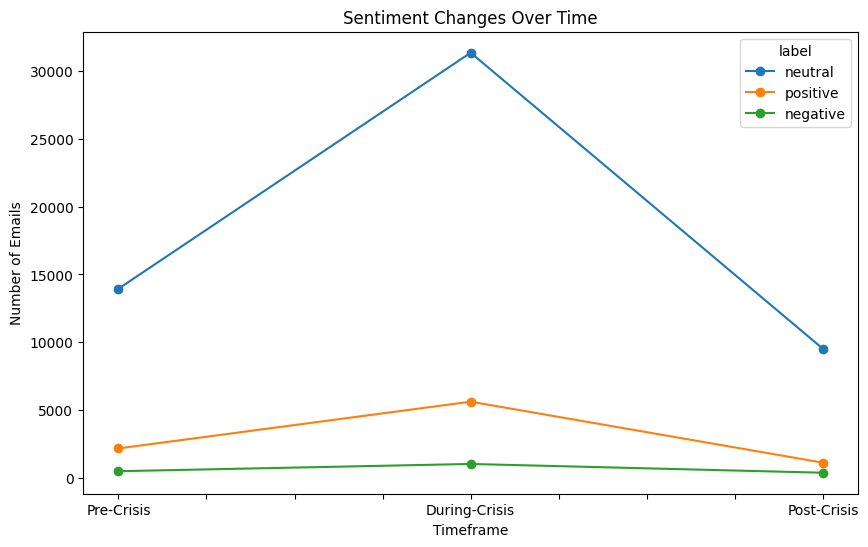

In [115]:
# Transpose the dataframe to have timeframes on the x-axis
sentiment_summary_T = sentiment_summary.T

# Create a line plot to show sentiment changes across timeframes
sentiment_summary_T.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels and title
plt.title('Sentiment Changes Over Time')
plt.xlabel('Timeframe')
plt.ylabel('Number of Emails')
plt.savefig('sentiment_analysis_line_chart.png', dpi = 300)
plt.show()